In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
output_pt = "/content/drive/MyDrive/4041ML/output"

In [34]:
SAVE_PATH = "/content/drive/MyDrive/4041ML/output/feature_eng/"

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv(output_pt + "/train.csv", parse_dates=['timestamp'])
test_df = pd.read_csv(output_pt + "/test.csv", parse_dates=['timestamp'])

In [5]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,1000.00,783.33,3,2,5,2,0,0,0,0,3,0,1,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1300.00,1030.00,0,1,2,1,1,0,0,0,2,0,0,0,0,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294


In [6]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870


## NULL Count *

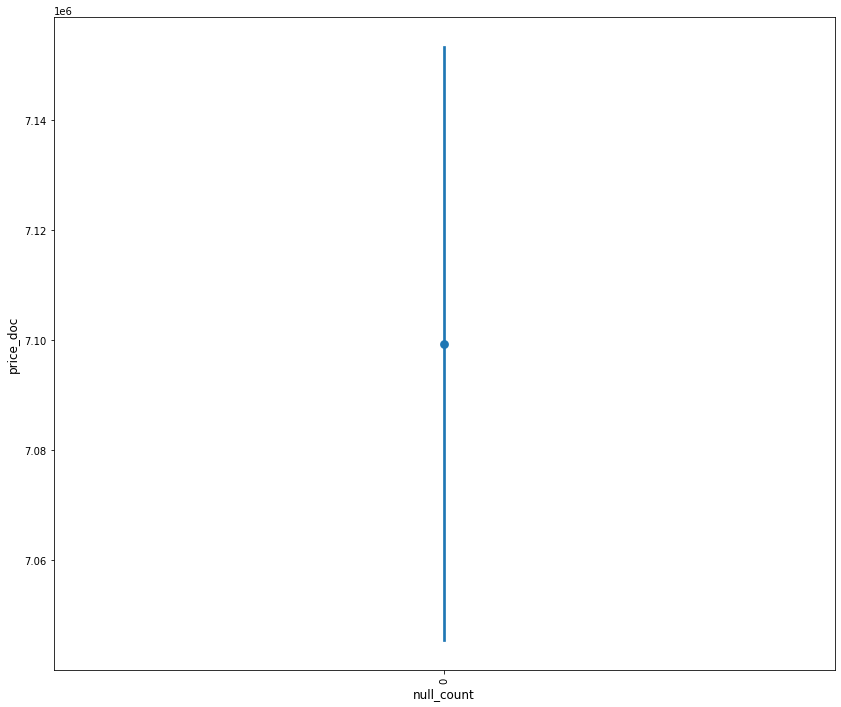

In [7]:
# NULL transfered to -99, for further test
train_df["null_count"] = train_df.isnull().sum(axis=1)
test_df["null_count"] = test_df.isnull().sum(axis=1)

plt.figure(figsize=(14,12))
sns.pointplot(x='null_count', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('null_count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# test_df = test_df.drop(['null_count'], axis=1)
# train_df = train_df.drop(['null_count'], axis=1)

## Timestamp +6

In [7]:
# year and month #
train_df["yearmonth"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.month
test_df["yearmonth"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.month

# year and week #
train_df["yearweek"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.weekofyear
test_df["yearweek"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.weekofyear

# year #
train_df["year"] = train_df["timestamp"].dt.year
test_df["year"] = test_df["timestamp"].dt.year

# month of year #
train_df["month_of_year"] = train_df["timestamp"].dt.month
test_df["month_of_year"] = test_df["timestamp"].dt.month

# week of year #
train_df["week_of_year"] = train_df["timestamp"].dt.weekofyear
test_df["week_of_year"] = test_df["timestamp"].dt.weekofyear

# day of week #
train_df["day_of_week"] = train_df["timestamp"].dt.weekday
test_df["day_of_week"] = test_df["timestamp"].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [8]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0


In [9]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,0,0,0,0,3,0,1,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,0,0,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2


## Area ratio +4

In [10]:
# area of the property is the top variables -> might helpful create some ratio variables around it (3 features added)

# ratio of living area to full area
train_df["ratio_life_full"] = train_df["life_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_life_full"] = test_df["life_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]<0] = 0
train_df["ratio_life_full"].iloc[train_df["ratio_life_full"]>1] = 1
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]<0] = 0
test_df["ratio_life_full"].iloc[test_df["ratio_life_full"]>1] = 1

# ratio of kitchen area to living area #
train_df["ratio_kitch_life"] = train_df["kitch_sq"] / np.maximum(train_df["life_sq"].astype("float"),1)
test_df["ratio_kitch_life"] = test_df["kitch_sq"] / np.maximum(test_df["life_sq"].astype("float"),1)
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]<0] = 0
train_df["ratio_kitch_life"].iloc[train_df["ratio_kitch_life"]>1] = 1
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]<0] = 0
test_df["ratio_kitch_life"].iloc[test_df["ratio_kitch_life"]>1] = 1

# ratio of kitchen area to full area #
train_df["ratio_kitch_full"] = train_df["kitch_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_kitch_full"] = test_df["kitch_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]<0] = 0
train_df["ratio_kitch_full"].iloc[train_df["ratio_kitch_full"]>1] = 1
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]<0] = 0
test_df["ratio_kitch_full"].iloc[test_df["ratio_kitch_full"]>1] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [11]:
# the difference between full area and living area

train_df["full_live_diff"] = train_df["full_sq"] - train_df["life_sq"]
test_df["full_live_diff"] = test_df["full_sq"] - test_df["life_sq"]

In [12]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0


In [13]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,3,0,1,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,2,0,0,0,0,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9


## Floor Proportion & Top Count +2

In [14]:
# The next important variables from EDA are floor and max_floor -> create two features: floor num/total num of floors; num of floor from the top

# floor of the house to the total number of floors in the apartment
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")

# num of floor from top #
train_df["floor_from_top"] = train_df["max_floor"] - train_df["floor"]
test_df["floor_from_top"] = test_df["max_floor"] - test_df["floor"]

In [15]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0,-0.040404,-103.0
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0,-0.030303,-102.0
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0,-0.020202,-101.0
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0,-0.090909,-108.0
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0,-0.040404,-103.0


In [16]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3,0.222222,7
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4,0.600000,2
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8,1.000000,0
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,1,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8,0.882353,2
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9,0.750000,3


## Age of building +1

In [17]:
# Age of building, listing yr - built yr

train_df["age_of_building"] = train_df["year"] - train_df["build_year"]
test_df["age_of_building"] = test_df["year"] - test_df["build_year"]

In [18]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0,-0.040404,-103.0,2110.0
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0,-0.030303,-102.0,2110.0
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0,-0.020202,-101.0,2110.0
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0,-0.090909,-108.0,2110.0
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0,-0.040404,-103.0,2110.0


In [19]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3,0.222222,7,17.0
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4,0.600000,2,55.0
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8,1.000000,0,-1.0
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8,0.882353,2,2114.0
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9,0.750000,3,43.0


## School +2

In [20]:
# number of children goiong to preschool / seats available in preschool

train_df["ratio_preschool"] = train_df["children_preschool"] / train_df["preschool_quota"].astype("float")
test_df["ratio_preschool"] = test_df["children_preschool"] / test_df["preschool_quota"].astype("float")

train_df["ratio_school"] = train_df["children_school"] / train_df["school_quota"].astype("float")
test_df["ratio_school"] = test_df["children_school"] / test_df["school_quota"].astype("float")

In [21]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0,-0.040404,-103.0,2110.0,1.914817,0.931676
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0,-0.030303,-102.0,2110.0,2.205835,1.244028
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0,-0.020202,-101.0,2110.0,4.018455,1.112366
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0,-0.090909,-108.0,2110.0,1.913584,0.801149
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0,-0.040404,-103.0,2110.0,1.761111,0.868468


In [22]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3,0.222222,7,17.0,1.180614,0.601697
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4,0.600000,2,55.0,2.867384,0.823249
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8,1.000000,0,-1.0,-4.939394,-4.737374
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8,0.882353,2,2114.0,2.109790,0.728351
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,44.28,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9,0.750000,3,43.0,1.349321,0.590766


## Apartment +1

In [23]:
# district name + dist to metro by car as str type

train_df['apartment_name']=train_df['sub_area'].astype(str) + train_df['metro_km_avto'].astype(str)
test_df['apartment_name']=test_df['sub_area'].astype(str) + test_df['metro_km_avto'].astype(str)

In [24]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,1,2011-08-20,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0,-0.040404,-103.0,2110.0,1.914817,0.931676,91.131259906
1,2,2011-08-23,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0,-0.030303,-102.0,2110.0,2.205835,1.244028,700.647336757
2,3,2011-08-27,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0,-0.020202,-101.0,2110.0,4.018455,1.112366,1291.637996285
3,4,2011-09-01,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0,-0.090909,-108.0,2110.0,1.913584,0.801149,650.984536582
4,5,2011-09-05,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0,-0.040404,-103.0,2110.0,1.761111,0.868468,60.876620232


In [25]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3,0.222222,7,17.0,1.180614,0.601697,380.7359083759999999
1,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4,0.600000,2,55.0,2.867384,0.823249,841.1222136059999999
2,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8,1.000000,0,-1.0,-4.939394,-4.737374,1046.038847546
3,30480,2015-07-01,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,...,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8,0.882353,2,2114.0,2.109790,0.728351,1232.037572376
4,30482,2015-07-01,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9,0.750000,3,43.0,1.349321,0.590766,1355.232565421


## Remove unneeded features for model building

In [26]:
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
test_X = test_df.drop(["id", "timestamp"] , axis=1)

In [27]:
train_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,43,27.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,0,86206,...,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,-99.000000,-99.000000,201108,201133,2011,8,33,5,0.627907,0.0,0.0,16.0,-0.040404,-103.0,2110.0,1.914817,0.931676,91.131259906
1,34,19.0,3.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,70,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,0,76284,...,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,37.604844,55.891007,201108,201134,2011,8,34,1,0.558824,0.0,0.0,15.0,-0.030303,-102.0,2110.0,2.205835,1.244028,700.647336757
2,43,29.0,2.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,129,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,0,101982,...,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,37.673135,55.676999,201108,201134,2011,8,34,5,0.674419,0.0,0.0,14.0,-0.020202,-101.0,2110.0,4.018455,1.112366,1291.637996285
3,89,50.0,9.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,-99.0,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,0,21155,...,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,37.741159,55.702946,201109,201135,2011,9,35,3,0.561798,0.0,0.0,39.0,-0.090909,-108.0,2110.0,1.913584,0.801149,650.984536582
4,77,77.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,0,28179,...,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,37.348920,55.843870,201109,201136,2011,9,36,0,1.000000,0.0,0.0,0.0,-0.040404,-103.0,2110.0,1.761111,0.868468,60.876620232


In [28]:
test_X.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,...,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,lon,lat,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_full,ratio_kitch_life,ratio_kitch_full,full_live_diff,ratio_floor_max_floor,floor_from_top,age_of_building,ratio_preschool,ratio_school,apartment_name
0,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,-99.0,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,0,102618,...,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,-99.000000,-99.000000,201507,201527,2015,7,27,2,0.530769,0.429952,0.228205,18.3,0.222222,7,17.0,1.180614,0.601697,380.7359083759999999
1,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,0,36154,...,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,37.673135,55.676999,201507,201527,2015,7,27,2,0.619753,0.191235,0.118519,15.4,0.600000,2,55.0,2.867384,0.823249,841.1222136059999999
2,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,-99.0,0,469,-99.0,0,0,-99.0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,9553,...,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,37.741159,55.702946,201507,201527,2015,7,27,2,0.573248,1.000000,1.000000,26.8,1.000000,0,-1.0,-4.939394,-4.737374,1046.038847546
3,38.8,-99.0,15,17,1,-99.0,1,1.0,1.0,1,123,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,0,0,5,1,0,0,0,0,0,0,0,0,125111,...,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,37.707976,55.733080,201507,201527,2015,7,27,2,0.000000,1.000000,0.025773,137.8,0.882353,2,2114.0,2.109790,0.728351,1232.037572376
4,45.4,28.5,9,12,5,1972.0,2,6.0,2.0,0,135,1.531990e+07,21040,0.051549,0.036270,1491,1105.0,1,1318,2231.0,1,0,200.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1285626,...,3.75,1,117300,3,139300,13,675.00,1166.67,920.83,1,2,6,3,1,0,0,1,7,0,0,7,0,37.599018,55.896294,201507,201527,2015,7,27,2,0.627753,0.210526,0.132159,16.9,0.750000,3,43.0,1.349321,0.590766,1355.232565421


## Log price ?

In [29]:
train_y = np.log1p(train_df.price_doc.values)

In [31]:
train_y[:5]

array([15.58195239, 15.60727019, 15.55597691, 16.38812286, 16.60860344])

## Outputs

In [38]:
TRAIN_X = "train_X.csv"
TEST_X = "test_X.csv"
TRAIN_Y = "train_y.csv"

In [40]:
train_X.to_csv(SAVE_PATH + TRAIN_X, index=False)
test_X.to_csv(SAVE_PATH + TEST_X, index=False)
pd.DataFrame(train_y).to_csv(SAVE_PATH + TRAIN_Y, index=False)